<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Model Read

In [14]:
#===============================================
# Basic Imports
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\modeling\JupyterLoad_modeling.py
import seaborn as sns
sns.set(style="whitegrid")

from tqdm import tqdm
import glob

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load tensorflow models
Load detection_pipe


In [15]:
list_of_models = glob.glob(BASE_FOLDER + '/modeling/pseudo_supervised/pipes_0406/*.pkl', recursive=True)
columns = ['model_path', 'roc_auc'
    , 'SNR', 'machine', 'ID', 'feature_type', 'feature_params'
    , 'model_type', 'model_params']
df = pd.DataFrame(columns=columns)

for i, model_path in enumerate(tqdm(list_of_models)):
    with open(model_path, 'rb') as model_file:
        model = pickle.load(model_file)
        #print(type(model))
        if 'uni_name' in dir(model):
            name = model.uni_name
        else:
            name = model.model.name

        data=[[
            model_path,
            model.roc_auc,
            model.task['SNR'],
            model.task['machine'],
            model.task['ID'],
            model.task['feat_col'],
            model.task['feat'],
            name,
            model.model_args]]
        df = df.append(pd.DataFrame(data=data, columns=columns))


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 120.16it/s]


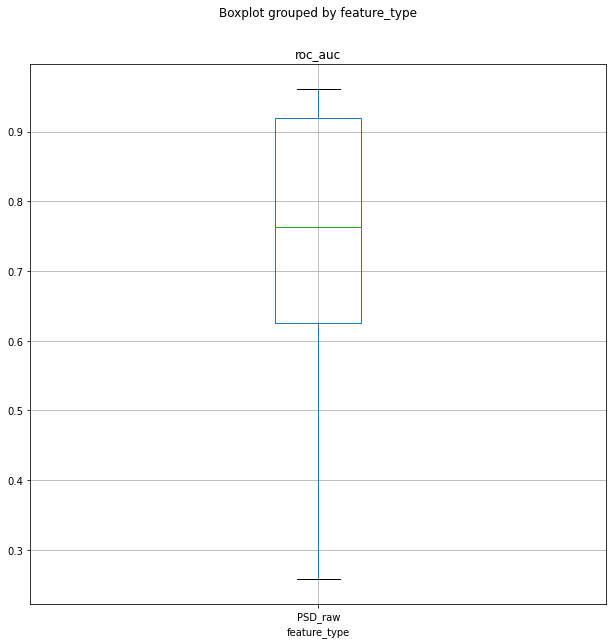

In [10]:
df[df.SNR=='min6dB'].boxplot(column='roc_auc', by='feature_type', figsize=(10,10))

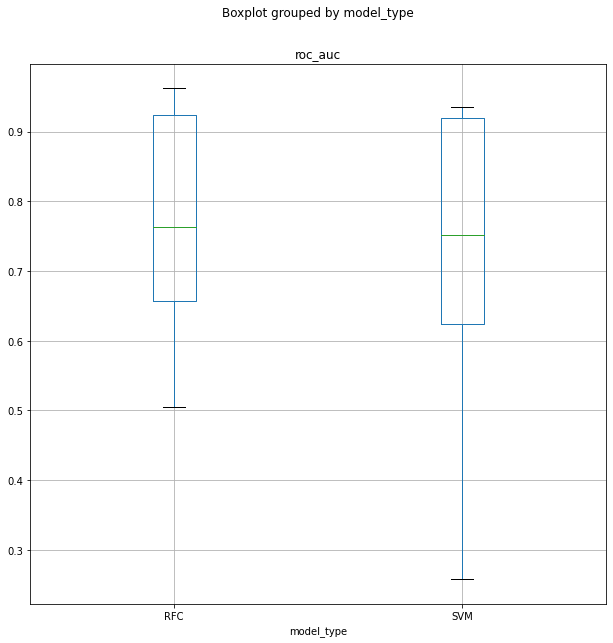

In [11]:
df[(df.SNR=='min6dB') & (df.feature_type=='PSD_raw')].boxplot(column='roc_auc', by='model_type', figsize=(10,10))

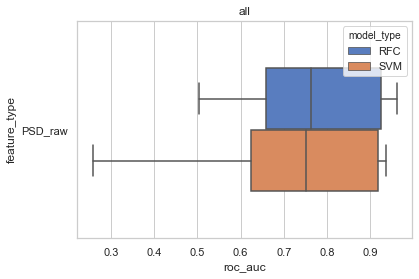

In [16]:
def plot_it():  
    sns.boxplot(x='roc_auc', y="feature_type", hue="model_type", data=df[(df.SNR=='min6dB')], 
               palette="muted")
    plt.title('all')
    plt.show()
plot_it()

## Conclusion

from the plots the best general pupose model apporches seem PSD_raw into RFC while sporadic machines like the valve would be best done with PSD_raw into a SVM

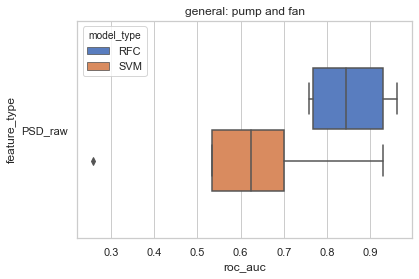

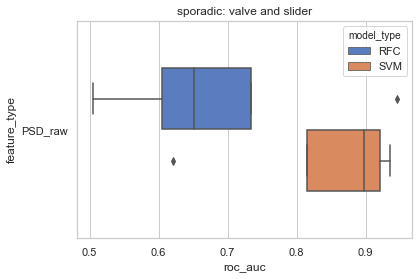

In [17]:
def plot_it(l,n):  
    f = ['PSD_raw']    
    sns.boxplot(x='roc_auc', y="feature_type", hue="model_type", data=df[(df.SNR=='min6dB') & (df.machine.isin(l))&(df.feature_type.isin(f))], 
               palette="muted")
    plt.title(n)
    plt.show()
plot_it(['pump', 'fan'],'general: pump and fan')  
#plot_it(['slider'],'semi')  
plot_it(['valve', 'slider'],'sporadic: valve and slider')  

In [18]:
def activtype(m):
    #print(m)
    if m.machine in ['pump', 'fan']:
        m.activ_type = 'continues'
        return m
    else:
        m.activ_type = 'sporadic'
        return m


    
df['activ_type'] = ''
df_2 = df.apply(lambda x: activtype(x), axis=1)
    
df_2.activ_type

0    continues
0    continues
0    continues
0    continues
0    continues
0    continues
0    continues
0    continues
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0    continues
0    continues
0    continues
0    continues
0    continues
0    continues
0    continues
0    continues
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0     sporadic
0     sporadic
Name: activ_type, dtype: object

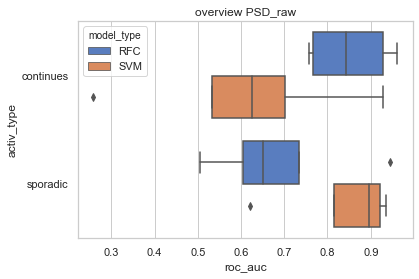

In [19]:


def plot_it(df,n):  
    f = ['PSD_raw']    
    sns.boxplot(x='roc_auc', y="activ_type", hue="model_type", data=df[(df.SNR=='min6dB') & (df.feature_type.isin(f))], 
               palette="muted")
    plt.title(n)
    plt.show()
plot_it(df_2,'overview PSD_raw')  


In [28]:
df[(df_2.SNR=='min6dB') & (df_2.model_type=='SVM') &
   (df_2.feature_type.isin(['PSD_raw'] )) &
   (df_2.activ_type=='sporadic') & (df_2.roc_auc<0.85)]

,model_path,roc_auc,SNR,machine,ID,feature_type,feature_params,model_type,model_params,activ_type
0,../..//modeling/pseudo_supervised/pipes_0406\P...,0.62125,min6dB,valve,06,PSD_raw,{'function': 'flat'},SVM,"{'C': 0.1, 'degree': 3, 'kernel': 'rbf'}",


In [30]:
df[(df_2.model_type=='RFC') &
   (df_2.feature_type.isin(['PSD_raw'] )) &
   (df_2.activ_type=='continues') & (df_2.roc_auc<0.8)]

,model_path,roc_auc,SNR,machine,ID,feature_type,feature_params,model_type,model_params,activ_type
0,../..//modeling/pseudo_supervised/pipes_0406\P...,0.757246,min6dB,fan,04,PSD_raw,{'function': 'flat'},RFC,{'max_depth': 2},
0,../..//modeling/pseudo_supervised/pipes_0406\P...,0.769800,min6dB,pump,06,PSD_raw,{'function': 'flat'},RFC,{'max_depth': 2},


# Conclusion
the derived apporche from ID 00 and ID 02 seems to hold all results are better then the base line.